In [65]:
import pandas as pd
import numpy as np

ad = pd.read_csv("/content/Advertising.csv")

In [66]:
from sklearn import linear_model
X = ad[['TV', 'radio','newspaper']]
y = ad['sales']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 0.04576465  0.18853002 -0.00103749]


In [67]:
ad.head()
x1 = ad['TV']
x2 = ad['radio']
x3 = ad['newspaper']
y = ad['sales']


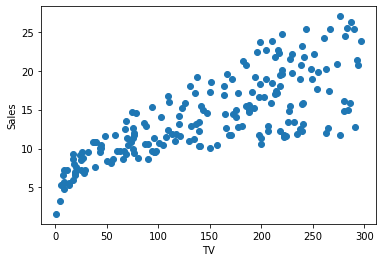

In [68]:
import matplotlib.pyplot as plt

plt.scatter(x1,y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

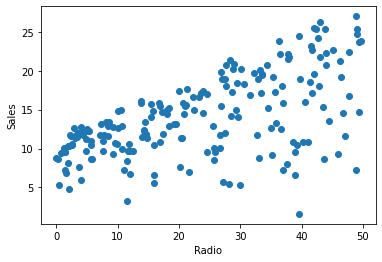

In [69]:
plt.scatter(x2,y)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

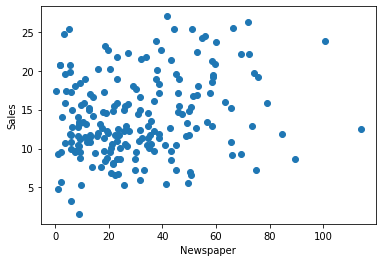

In [70]:
plt.scatter(x3,y)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

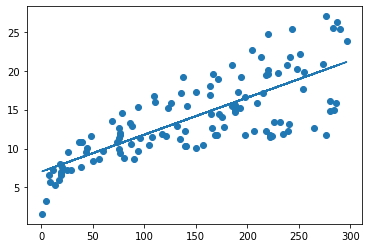

In [71]:
from scipy import stats


slope, intercept, r, p, std_err = stats.linregress(x1, y)

def pred(x):
  return slope * x + intercept
  
train_x1 = x1[:80]
train_y = y[:80]

test_x1 = x1[80:]
test_y = y[80:]

mymodel = list(pred(test_x1))

plt.scatter(test_x1, test_y)
plt.plot(test_x1, mymodel)
plt.show()

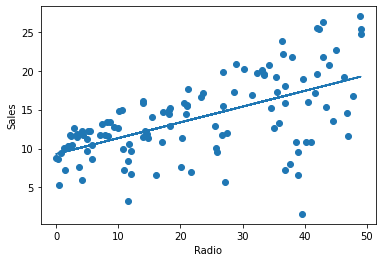

In [72]:
slope, intercept, r, p, std_err = stats.linregress(x2, y)


train_x2 = x2[:80]
train_y = y[:80]

test_x2 = x2[80:]
test_y = y[80:]

mymodel = list(pred(test_x2))

plt.scatter(test_x2, test_y)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.plot(test_x2, mymodel)
plt.show()

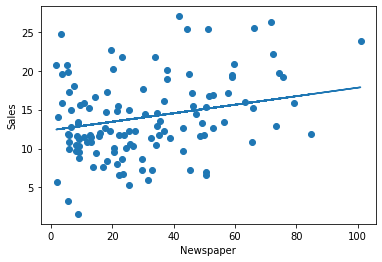

In [73]:
slope, intercept, r, p, std_err = stats.linregress(x3, y)

train_x3 = x3[:80]
train_y = y[:80]

test_x3 = x3[80:]
test_y = y[80:]

mymodel = list(pred(test_x3))

plt.scatter(test_x3, test_y)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.plot(test_x3, mymodel)
plt.show()

In [74]:
def cost_func(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
cost_func(y,pred(test_x1))

32.84352469245186

In [75]:
def normal_equ(x,y):
  a = np.dot(x.T,x)
  b = np.linalg.pinv(a)
  c = np.dot(b, x.T)
  theta = np.dot(c, y)
  return theta
  
normal_equ(X,y)

array([0.05379188, 0.22222731, 0.01681639])

In [76]:
import random
def reg(y,y_pred,lamda, theta,m):
  E = 1/(2*m)/(np.sum(y_pred-y)**2 + lamda*np.sum(theta**2))
  return E

X2 = reg(y,pred(X),0.01,random.random(),len(y))
reg(y,pred(X2),0.01,random.random(),len(y))

2.52001428449976e-08